# Task # 3 - To Explore Unsupervised Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets
from matplotlib import style
style.use('ggplot')
import seaborn as sns
iris = datasets.load_iris()
#we are usingh
df=pd.DataFrame(iris['data'])

# Vistualizing data

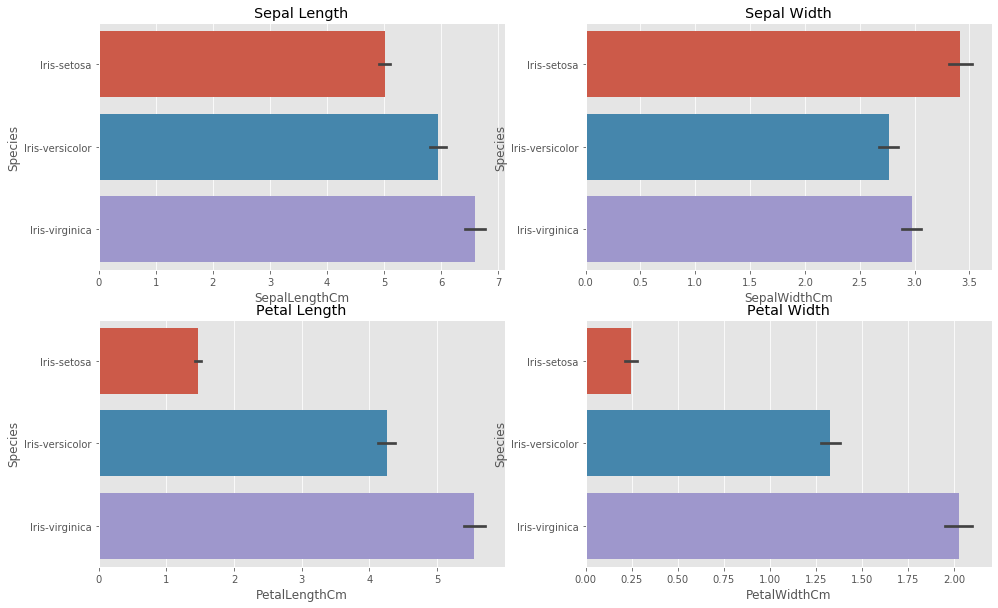

In [3]:
visual=pd.read_csv('iris.csv')
fig = plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
sns.barplot(y='Species',x='SepalLengthCm',data=visual)
plt.title("Sepal Length")

plt.subplot(2, 2, 2)
sns.barplot(y='Species',x='SepalWidthCm',data=visual)
plt.title("Sepal Width")

plt.subplot(2, 2, 3)
sns.barplot(y='Species',x='PetalLengthCm',data=visual)
plt.title("Petal Length")

plt.subplot(2, 2, 4)
sns.barplot(y='Species',x='PetalWidthCm',data=visual)
plt.title("Petal Width")

plt.show()

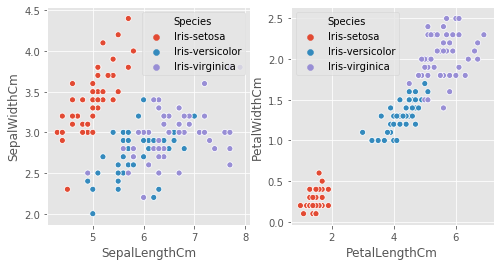

In [4]:
fig = plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.scatterplot(data=visual,x="SepalLengthCm" ,y="SepalWidthCm", hue="Species")

plt.subplot(1,2,2)
sns.scatterplot(data=visual,x="PetalLengthCm" ,y="PetalWidthCm", hue="Species")

#plt.subplot(2, 2, 4)
#sns.barplot(y=df.Species,x=df.PetalWidthCm)

plt.show()
#sns.scatterplot(data=df, x="", y="", hue="Species")

# Running K-Means with a range of k

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

# Plotting the distortions of K-Means(Elbow method)

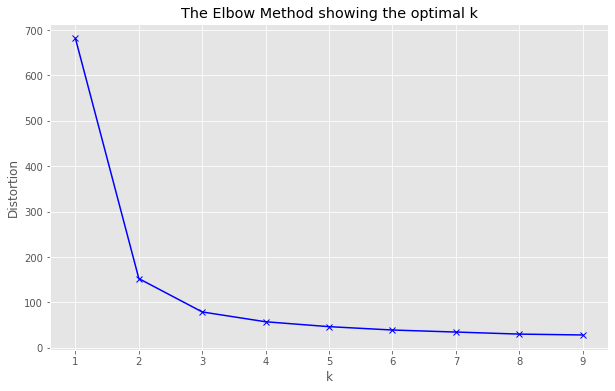

In [6]:
plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the “elbow” is the number 3 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 3.

In [7]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# K-Means vs Actual for n_clusters=3

Text(0.5, 1.0, 'K_Means(k=3)')

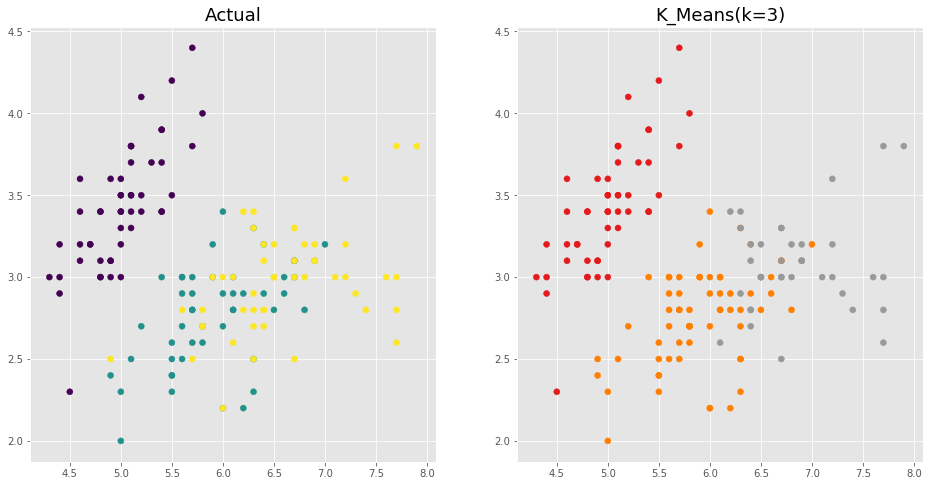

In [9]:
df['k_means']=kmeanModel.predict(df)
df['target']=iris['target']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df[0], df[1], c=df['target'])
axes[1].scatter(df[0], df[1], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means(k=3)', fontsize=18)


This concludes the K-Means Works